In [13]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [14]:
(X_train, y_train),(X_test,y_test) = datasets.cifar10.load_data()

In [15]:
print(X_train.shape)
print(y_train.shape)

(50000, 32, 32, 3)
(50000, 1)


In [16]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [17]:
y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)

In [18]:
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [19]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [20]:
def sample_plot(X,Y,index):
    plt.figure(figsize=(15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[Y[index]])

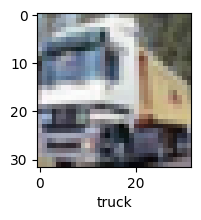

In [21]:
sample_plot(X_train,y_train,1)

In [22]:
X_train = X_train/255
X_test = X_test/255

In [12]:
model = models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000,activation='relu'),
    layers.Dense(1000,activation='relu'),
    layers.Dense(10,activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train,y_train,epochs=5)

Epoch 1/5
1563/1563 [==============================] - 308s 196ms/step - loss: 1.8874 - accuracy: 0.3296
Epoch 2/5
1563/1563 [==============================] - 301s 193ms/step - loss: 1.6626 - accuracy: 0.4034
Epoch 3/5
1563/1563 [==============================] - 301s 192ms/step - loss: 1.5833 - accuracy: 0.4313
Epoch 4/5
1563/1563 [==============================] - 308s 197ms/step - loss: 1.5324 - accuracy: 0.4493
Epoch 5/5
1563/1563 [==============================] - 320s 205ms/step - loss: 1.4927 - accuracy: 0.4665


In [24]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = model.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 11s 33ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.40      0.63      0.49      1000
           1       0.54      0.65      0.59      1000
           2       0.27      0.40      0.32      1000
           3       0.35      0.32      0.33      1000
           4       0.38      0.42      0.40      1000
           5       0.43      0.23      0.30      1000
           6       0.50      0.42      0.46      1000
           7       0.61      0.38      0.47      1000
           8       0.52      0.63      0.57      1000
           9       0.68      0.33      0.45      1000

    accuracy                           0.44     10000
   macro avg       0.47      0.44      0.44     10000
weighted avg       0.47      0.44      0.44     10000



In [25]:
cnn = models.Sequential([
    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax')
])

cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

cnn.fit(X_train,y_train,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 60s 38ms/step - loss: 1.4850 - accuracy: 0.4656
Epoch 2/10
1563/1563 [==============================] - 63s 40ms/step - loss: 1.1425 - accuracy: 0.6003
Epoch 3/10
1563/1563 [==============================] - 57s 36ms/step - loss: 1.0138 - accuracy: 0.6478
Epoch 4/10
1563/1563 [==============================] - 57s 37ms/step - loss: 0.9336 - accuracy: 0.6770
Epoch 5/10
1563/1563 [==============================] - 59s 37ms/step - loss: 0.8781 - accuracy: 0.6977
Epoch 6/10
1563/1563 [==============================] - 56s 36ms/step - loss: 0.8197 - accuracy: 0.7159
Epoch 7/10
1563/1563 [==============================] - 55s 35ms/step - loss: 0.7742 - accuracy: 0.7325
Epoch 8/10
1563/1563 [==============================] - 55s 35ms/step - loss: 0.7372 - accuracy: 0.7457
Epoch 9/10
1563/1563 [==============================] - 57s 37ms/step - loss: 0.6942 - accuracy: 0.7601
Epoch 10/10
1563/1563 [==============================] - 59s 38m

In [26]:
y_pred = cnn.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 7s 23ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.81      0.64      0.72      1000
           1       0.86      0.75      0.80      1000
           2       0.53      0.66      0.59      1000
           3       0.53      0.47      0.50      1000
           4       0.68      0.61      0.64      1000
           5       0.49      0.68      0.57      1000
           6       0.82      0.72      0.77      1000
           7       0.77      0.72      0.74      1000
           8       0.78      0.81      0.80      1000
           9       0.76      0.81      0.78      1000

    accuracy                           0.69     10000
   macro avg       0.70      0.69      0.69     10000
weighted avg       0.70      0.69      0.69     10000



In [27]:
y_pred[:5]

array([[9.20061138e-04, 2.44505682e-05, 5.53739257e-03, 8.57671082e-01,
        7.55997840e-04, 5.50513007e-02, 7.21579641e-02, 2.35237851e-04,
        7.45380670e-03, 1.92639127e-04],
       [2.06319662e-03, 7.53258705e-01, 1.62816013e-05, 1.36400752e-06,
        1.17829973e-06, 8.09299578e-08, 7.83249632e-10, 7.35788603e-08,
        2.42735878e-01, 1.92316761e-03],
       [2.02497214e-01, 1.55330360e-01, 5.78518286e-02, 2.83587277e-02,
        1.62498895e-02, 2.16245395e-03, 2.23680097e-03, 4.31666896e-03,
        5.20966351e-01, 1.00296959e-02],
       [7.74837971e-01, 6.93500508e-03, 5.30126244e-02, 2.22597830e-02,
        2.09834669e-02, 1.10328081e-04, 6.36669283e-04, 2.87972670e-02,
        8.48861262e-02, 7.54072145e-03],
       [1.25900590e-06, 1.30413655e-05, 2.49483716e-02, 3.02368440e-02,
        6.84599221e-01, 7.27622479e-04, 2.59457886e-01, 7.65051209e-06,
        5.63291360e-06, 2.54162524e-06]], dtype=float32)

In [39]:
y_pred = np.argmax(y_pred,axis=1)

AxisError: axis 1 is out of bounds for array of dimension 1

In [40]:
y_pred[:5]

array([3, 1, 8, 0, 4])

In [30]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

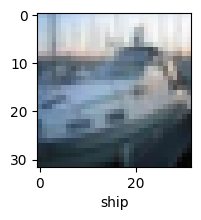

In [42]:
sample_plot(X_test,y_test,2)

In [43]:
classes[y_pred[2]]

'ship'

<Axes: >

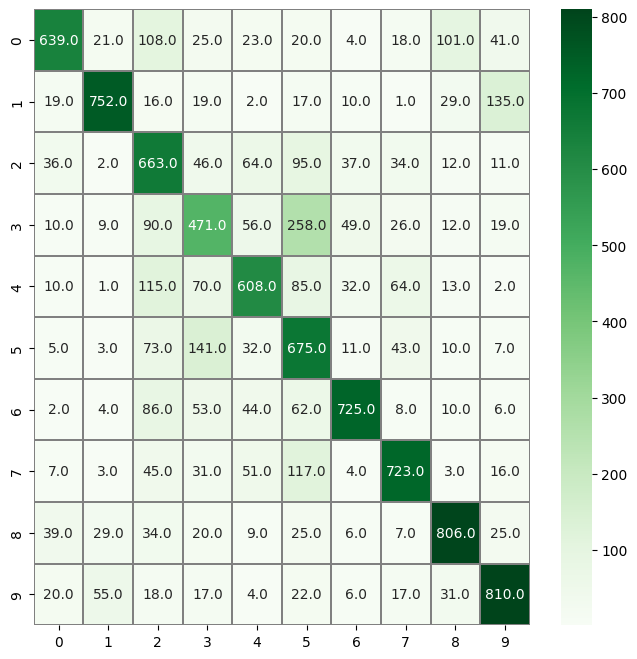

In [46]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
confusion_mtx = confusion_matrix(y_test, y_pred)

f, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)